In [118]:
%run globals

In [119]:
with open('FandB.pkl', 'rb') as infile:
     NDtoD_FF,DtoND_FF,NDtoD_FB,DtoND_FB = pickle.load(infile)
with open('HyrHyd_boxplot_data.pkl', 'rb') as infile:
     NDtoD_Hyr,DtoND_Hyr,NDtoD_Hyd,DtoND_Hyd = pickle.load(infile)
with open('time_boxplot_data.pkl', 'rb') as infile:
    NDtoD_time,DtoND_time = pickle.load(infile)

## Plot F_2norm

In [120]:
def plot_2norm(NDtoD,DtoND,ylabel,fname,ylim):
    
    yticks = np.arange(ylim[0],ylim[1],1)
    
    figsize = (5,3.5)
    
    #print('right -> left')
    plt.figure(figsize=figsize)
    ax = sns.boxplot(x='hand',y='value',hue='variable',data=DtoND,palette=colors)
    
    for a in ax.artists:
        a.set_edgecolor('black')
    for l in ax.lines:
        l.set_color('black')
    
    ax.set_ylabel(ylabel)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(length=10,width=3,direction='inout')
    
    xlim = np.array(ax.get_xlim())
    ax.fill_between(xlim[0]+np.hstack((0,np.diff(xlim)/2)),ylim[0]*np.ones(2),ylim[1]*np.ones(2),
                    color=colors['D'],alpha=.5,zorder=-1,ec=None)
    ax.fill_between(xlim[1]+np.hstack((-np.diff(xlim)/2,0)),ylim[0]*np.ones(2),ylim[1]*np.ones(2),
                    color=colors['N'],alpha=.5,zorder=-1,ec=None)
    ax.set_xlim(xlim)
    
    ax.set_xticks([])
    #ax.set_xticklabels(['dom','non-dom'])
    ax.set_yticks(yticks)
    ax.set_yticklabels(['%0.0f'%t for t in ax.get_yticks()], **font)
    
    ax.set_ylim(ylim)
    ax.set_xlabel('')
    ax.legend_.remove()
    
    plt.tight_layout()
    
    fig = plt.gcf()
    fig.savefig(fname+'_D2ND.svg')
    
    plt.show()
    
    #print('left -> right ')
    plt.figure(figsize=figsize)
    ax = sns.boxplot(x='hand',y='value',hue='variable',data=NDtoD,order=['Non-Dominant','Dominant'],palette=colors)
    
    for a in ax.artists:
        a.set_edgecolor('black')
    for l in ax.lines:
        l.set_color('black')
    
    xlim = np.array(ax.get_xlim())
    ax.fill_between(xlim[1]+np.hstack((-np.diff(xlim)/2,0)),ylim[0]*np.ones(2),ylim[1]*np.ones(2),
                    color=colors['D'],alpha=.5,zorder=-1,ec=None)
    ax.fill_between(xlim[0]+np.hstack((0,np.diff(xlim)/2)),ylim[0]*np.ones(2),ylim[1]*np.ones(2),
                    color=colors['N'],alpha=.5,zorder=-1,ec=None)
    ax.set_xlim(xlim)
    
    ax.set_xticks([])
    #ax.set_xticklabels(['non-dom','dom'])
    ax.set_yticks(yticks)
    ax.set_yticklabels(['%0.0f'%t for t in ax.get_yticks()], **font)
    
    ax.set_ylabel(ylabel)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(length=10,width=3,direction='inout')
    ax.set_ylim(ylim)
    ax.set_xlabel('')
    ax.legend_.remove()
    
    plt.tight_layout()
    
    fig = plt.gcf()
    fig.savefig(fname+'_ND2D.svg')
    
    plt.show()

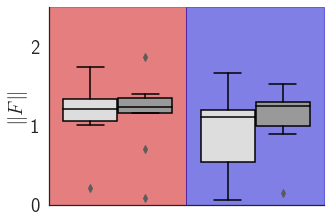

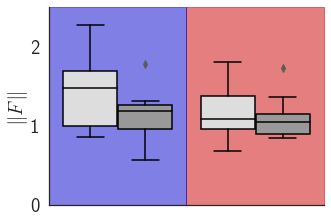

In [126]:
plot_2norm(NDtoD_FF,DtoND_FF,r'$\|F\|$','Fbox',(0,2.5))

## Plot B_{2norm}

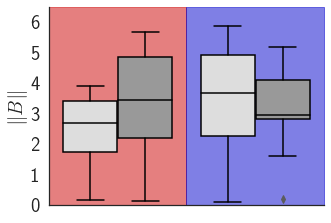

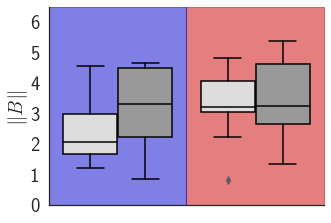

In [128]:
plot_2norm(NDtoD_FB,DtoND_FB,'$\|B\|$','Bbox',(0,6.5))

## Plot Hyr-1

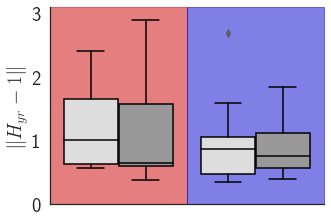

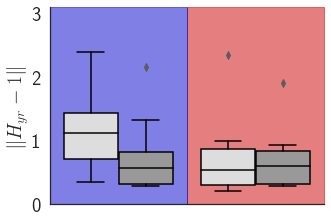

In [130]:
plot_2norm(NDtoD_Hyr,DtoND_Hyr,'$\|H_{yr}-1\|$','Hyrbox',(0,3.1))

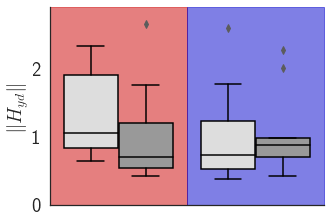

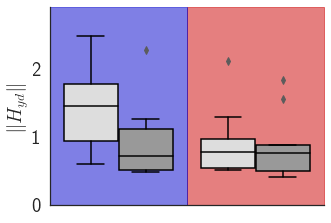

In [131]:
plot_2norm(NDtoD_Hyd,DtoND_Hyd,'$\|H_{yd}\|$','Hyd',(0,2.9))

## Plot time-domain error

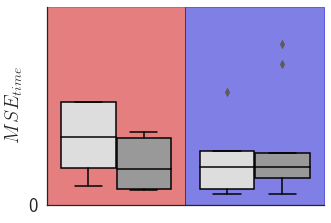

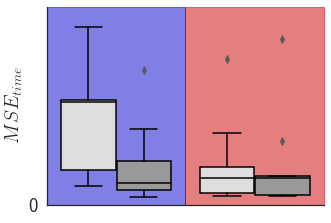

In [133]:
plot_2norm(NDtoD_time,DtoND_time,'$MSE_{time}$','MSEtimebox',(0,.5))